In [1257]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

CDC by age

In [1258]:
age_sex_data = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")

In [1259]:
age_data = age_sex_data.loc[(age_sex_data['Sex'] == 'All Sexes')]
#age_data = age_data.loc[age_data['State'] == 'United States']
#age_data = age_data.loc[age_data['Age Group'] == '85 years and over']
age_data = age_data.loc[age_data['Group']== 'By Total']
age_data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,All Ages,557486.0,4355577.0,484412.0,272424.0,9083.0,777296.0,NaN
1,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,66.0,23862.0,257.0,10.0,21.0,334.0,NaN
2,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,277.0,41811.0,703.0,54.0,179.0,1105.0,NaN
3,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,34.0,4286.0,145.0,6.0,61.0,234.0,NaN
4,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,98.0,6930.0,203.0,21.0,76.0,356.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,Puerto Rico,All Sexes,50-64 years,415.0,5183.0,723.0,287.0,22.0,869.0,NaN
2716,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,Puerto Rico,All Sexes,55-64 years,305.0,4010.0,569.0,212.0,13.0,673.0,NaN
2717,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,Puerto Rico,All Sexes,65-74 years,532.0,7076.0,1113.0,386.0,14.0,1272.0,NaN
2718,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,Puerto Rico,All Sexes,75-84 years,575.0,9916.0,1578.0,399.0,23.0,1776.0,NaN


In [1260]:
del age_data['Footnote']
del age_data['Data As Of']
del age_data['Sex']
del age_data['Pneumonia Deaths']
del age_data['Pneumonia and COVID-19 Deaths']
del age_data['Influenza Deaths']
del age_data['Pneumonia, Influenza, or COVID-19 Deaths']

In [1261]:
age_data = age_data.fillna(0)
#age_data.head()

In [1262]:
age_data = age_data.reset_index(drop=True)
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
1,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 1 year,66.0,23862.0
2,1/1/20,4/24/21,By Total,0.0,0.0,United States,0-17 years,277.0,41811.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,1-4 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0
...,...,...,...,...,...,...,...,...,...
913,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,50-64 years,415.0,5183.0
914,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,55-64 years,305.0,4010.0
915,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,65-74 years,532.0,7076.0
916,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,75-84 years,575.0,9916.0


In [1263]:
age_data.to_csv("../Folder2/us-age-data.csv", index=False, header=True)

In [1264]:
age_data.to_csv("../Folder2/age-data.csv", index=False, header=True)

CDC by sex


In [1265]:
sex_data = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#sex_data.head()

In [1266]:
all_ages = sex_data.loc[sex_data['Age Group'] == 'All Ages']
all_ages = all_ages.loc[all_ages['Group']=='By Total']
sex_state = all_ages.loc[all_ages['State']!='Puerto Rico']
sex_state = sex_state.loc[sex_state['State']!='United States']
sex_state = sex_state.loc[sex_state['State']!='District of Columbia']
sex_data = sex_state.loc[sex_state['Sex'] != 'All Sexes']

In [1267]:
del sex_data['Footnote']
del sex_data['Data As Of']
del sex_data['Age Group']
del sex_data['Pneumonia Deaths']
del sex_data['Pneumonia and COVID-19 Deaths']
del sex_data['Influenza Deaths']
del sex_data['Pneumonia, Influenza, or COVID-19 Deaths']
sex_data = sex_data.fillna(0)

In [1268]:
sex_data = sex_data.reset_index(drop=True)
sex_data.head()

,Start Date,End Date,Group,Year,Month,State,Sex,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,Male,5576.0,43447.0
1,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,Female,4839.0,39660.0
2,1/1/20,4/24/21,By Total,0.0,0.0,Alaska,Male,192.0,3574.0
3,1/1/20,4/24/21,By Total,0.0,0.0,Alaska,Female,132.0,2609.0
4,1/1/20,4/24/21,By Total,0.0,0.0,Arizona,Male,9146.0,56682.0


In [1269]:
sex_data.to_csv("../Folder2/sex-data.csv", index=False, header=True)

Race Data from CDC

In [1270]:
race_ethnicity_data = pd.read_csv("../Folder1/race-ethnicity.csv")

In [1271]:
del race_ethnicity_data['Footnote']
del race_ethnicity_data['Data as of']

In [1272]:
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['Group'] == 'By Total')]
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['State'] == 'United States')]
#race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['State']!='District of Columbia']
#race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['Indicator']!='Unweighted distribution of population (%)']
race_ethnicity_data = race_ethnicity_data.fillna(0)
#race_ethnicity_data.head()

In [1273]:
race_ethnicity_data.rename(columns={"Non-Hispanic White": "White", "Non-Hispanic Black or African American": "Black or African American", "Non-Hispanic American Indian or Alaska Native":
                               "American Indian or Alaska Native", "Non-Hispanic Asian": "Asian", "Non-Hispanic Native Hawaiian or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
                               "Deaths_AIAN": "Deaths: AIAN", "Deaths_NHPI": "Deaths: NHPI", "Deaths_Multiracial": "Deaths: Multiracial",
                               "Non Hispanic more than one race": "More Than One Race"})
race_ethnicity_data

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
0,01/01/2020,04/24/2021,2020/2021,0.0,By Total,United States,Count of COVID-19 deaths,338429.0,82218.0,6342.0,21689.0,1017.0,1793.0,104088.0
1,01/01/2020,04/24/2021,2020/2021,0.0,By Total,United States,Distribution of COVID-19 deaths (%),60.7,14.7,1.1,3.9,0.2,0.3,18.7
2,01/01/2020,04/24/2021,2020/2021,0.0,By Total,United States,Unweighted distribution of population (%),60.1,12.5,0.7,5.8,0.2,2.2,18.5
3,01/01/2020,04/24/2021,2020/2021,0.0,By Total,United States,Weighted distribution of population (%),39.6,13.2,0.4,10.1,0.2,2.1,34.5


In [1274]:
distribution = race_ethnicity_data.loc[race_ethnicity_data['Indicator'] == 'Distribution of COVID-19 deaths (%)']
distribution

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
1,01/01/2020,04/24/2021,2020/2021,0.0,By Total,United States,Distribution of COVID-19 deaths (%),60.7,14.7,1.1,3.9,0.2,0.3,18.7


In [1275]:
#dis_list = []
#dis_list.append(white)
#dis_list

In [1276]:
race_ethnicity_data = race_ethnicity_data.reset_index(drop=True)

In [1277]:
race_ethnicity_data.to_csv("../Folder2/race-population-data.csv", index=False, header=True)

trying to merge

In [1278]:
race_data = pd.read_csv("../Folder2/race-population-data.csv")
#race_data.head()

In [1279]:
age_data = pd.read_csv("../Folder2/us-age-data.csv")
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
1,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 1 year,66.0,23862.0
2,1/1/20,4/24/21,By Total,0.0,0.0,United States,0-17 years,277.0,41811.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,1-4 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0
...,...,...,...,...,...,...,...,...,...
913,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,50-64 years,415.0,5183.0
914,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,55-64 years,305.0,4010.0
915,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,65-74 years,532.0,7076.0
916,1/1/20,4/24/21,By Total,0.0,0.0,Puerto Rico,75-84 years,575.0,9916.0


In [1280]:
age_data = age_data.loc[age_data['Age Group'] != "18-29 years"]
age_data = age_data.loc[age_data['Age Group'] != "0-17 years"]
age_data = age_data.loc[age_data['Age Group'] != "Under 1 year"]
age_data = age_data.loc[age_data['Age Group'] != "30-39 years"]
age_data = age_data.loc[age_data['Age Group'] != "40-49 years"]
age_data = age_data.loc[age_data['Age Group'] != "50-64 years"]
age_data = age_data.loc[age_data['State'] != "Puerto Rico"]
age_data = age_data.loc[age_data['State'] != "District of Columbia"]
age_data = age_data.loc[age_data['State'] != "New York City"]

In [1281]:
age_data['Age Group'] = age_data['Age Group'].replace(
    {'1-4 years': 'Under 5 years'})

In [1282]:
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0
...,...,...,...,...,...,...,...,...,...
895,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,45-54 years,24.0,371.0
897,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,55-64 years,60.0,942.0
898,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,65-74 years,137.0,1454.0
899,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,75-84 years,190.0,1739.0


In [1283]:
pop_data = pd.read_csv("../Folder2/Population_byCDCAgeGroup_byState.csv")

In [1284]:
pop_data = pop_data.rename(columns={"CDC_AgeGroups":"Age Group"})
totals = pop_data.loc[pop_data['Age Group']=='Total']


In [1285]:
merged_df = pd.merge(age_data, pop_data,  how='left', left_on=['State','Age Group'], right_on = ['State','Age Group'])

In [1286]:
merged_df = merged_df.loc[merged_df['State']!='United States']
merged_df = merged_df.loc[merged_df['Age Group']!='All Ages']
merged_df

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population
12,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,Under 5 years,0.0,111.0,294357.0
13,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,5-14 years,0.0,125.0,608466.0
14,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,15-24 years,11.0,922.0,635707.0
15,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,25-34 years,71.0,1726.0,647229.0
16,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,35-44 years,204.0,2767.0,593306.0
...,...,...,...,...,...,...,...,...,...,...
556,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,45-54 years,24.0,371.0,63853.0
557,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,55-64 years,60.0,942.0,78754.0
558,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,65-74 years,137.0,1454.0,60590.0
559,1/1/20,4/24/21,By Total,0.0,0.0,Wyoming,75-84 years,190.0,1739.0,27598.0


In [1287]:
del merged_df['Month']
del merged_df['Year']
del merged_df['Total Deaths']

In [1288]:
groupby_df = merged_df.groupby(['State'])
groupby_df.head()

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Population
12,1/1/20,4/24/21,By Total,Alabama,Under 5 years,0.0,294357.0
13,1/1/20,4/24/21,By Total,Alabama,5-14 years,0.0,608466.0
14,1/1/20,4/24/21,By Total,Alabama,15-24 years,11.0,635707.0
15,1/1/20,4/24/21,By Total,Alabama,25-34 years,71.0,647229.0
16,1/1/20,4/24/21,By Total,Alabama,35-44 years,204.0,593306.0
...,...,...,...,...,...,...,...
551,1/1/20,4/24/21,By Total,Wyoming,Under 5 years,0.0,34931.0
552,1/1/20,4/24/21,By Total,Wyoming,5-14 years,0.0,76734.0
553,1/1/20,4/24/21,By Total,Wyoming,15-24 years,0.0,74590.0
554,1/1/20,4/24/21,By Total,Wyoming,25-34 years,0.0,76433.0


In [1289]:
state_name = []
age_group = []
population = []

In [1290]:
state_name = merged_df['State'].tolist()
age_group = merged_df['Age Group'].tolist()
population = merged_df['Population'].tolist()

In [1291]:

#alaska_pop = (alaska_df['Population']/731545.0)*100


In [1292]:
sum_state = groupby_df["Population"].sum()
sum_state

State
Alabama            4903185.0
Alaska              731545.0
Arizona            7278717.0
Arkansas           3017804.0
California        39512223.0
Colorado           5758736.0
Connecticut        3565287.0
Delaware            973764.0
Florida           21477737.0
Georgia           10617423.0
Hawaii             1415872.0
Idaho              1787065.0
Illinois          12671821.0
Indiana            6732219.0
Iowa               3155070.0
Kansas             2913314.0
Kentucky           4467673.0
Louisiana          4648794.0
Maine              1344212.0
Maryland           6045680.0
Massachusetts      6892503.0
Michigan           9986857.0
Minnesota          5639632.0
Mississippi        2976149.0
Missouri           6137428.0
Montana            1068778.0
Nebraska           1934408.0
Nevada             3080156.0
New Hampshire      1359711.0
New Jersey         8882190.0
New Mexico         2096829.0
New York          19453561.0
North Carolina    10488084.0
North Dakota        762062.0
Ohio    

In [1293]:
age_data2 = pd.read_csv("../Folder1/Death_Counts_by_Sex_Age_and_State.csv")

In [1294]:
age_data2 = age_data2.loc[(age_data2['Sex'] == 'All Sexes')]
age_data2 = age_data2.loc[age_data2['State'] == 'United States']
#age_data = age_data.loc[age_data['Age Group'] == '85 years and over']
age_data2 = age_data2.loc[age_data2['Group']== 'By Total']
age_data2 = age_data2.loc[age_data2['Age Group'] != "18-29 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "0-17 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "Under 1 year"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "30-39 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "40-49 years"]
age_data2 = age_data2.loc[age_data2['Age Group'] != "50-64 years"]
age_data2 = age_data2.loc[age_data2['State'] != "Puerto Rico"]
age_data2 = age_data2.loc[age_data2['State'] != "District of Columbia"]
age_data2 = age_data2.loc[age_data2['State'] != "New York City"]
del age_data2['Footnote']
del age_data2['Data As Of']
del age_data2['Sex']
del age_data2['Pneumonia Deaths']
del age_data2['Pneumonia and COVID-19 Deaths']
del age_data2['Influenza Deaths']
del age_data2['Month']
del age_data2['Year']
del age_data2['Pneumonia, Influenza, or COVID-19 Deaths']
#age_data2

In [1295]:
pop_list = []
pop_list.append(total_pop)
pop_list.append(under_pop)
pop_list.append(years_5_14_sum)
pop_list.append(years_15_24_sum)
pop_list.append(years_25_34_sum)
pop_list.append(years_35_44_sum)
pop_list.append(years_45_54_sum)
pop_list.append(years_55_64_sum)
pop_list.append(years_65_74_sum)
pop_list.append(years_75_84_sum)
pop_list.append(years_85_sum)
#pop_list

In [1296]:
total_data= pop_data.loc[pop_data['Age Group']=='Total']
total_pop = total_data['Population'].sum()
under_data= pop_data.loc[pop_data['Age Group']=='Under 5 years']
under_pop = under_data['Population'].sum()
years_5_14 = pop_data.loc[pop_data['Age Group']=='5-14 years']
years_5_14_sum = years_5_14['Population'].sum()
years_15_24 = pop_data.loc[pop_data['Age Group']=='15-24 years']
years_15_24_sum = years_15_24['Population'].sum()
years_25_34 = pop_data.loc[pop_data['Age Group']=='25-34 years']
years_25_34_sum = years_25_34['Population'].sum()
years_35_44 = pop_data.loc[pop_data['Age Group']=='35-44 years']
years_35_44_sum = years_35_44['Population'].sum()
years_45_54 = pop_data.loc[pop_data['Age Group']=='45-54 years']
years_45_54_sum = years_45_54['Population'].sum()
years_55_64 = pop_data.loc[pop_data['Age Group']=='55-64 years']
years_55_64_sum = years_55_64['Population'].sum()
years_65_74 = pop_data.loc[pop_data['Age Group']=='65-74 years']
years_65_74_sum = years_65_74['Population'].sum()
years_75_84 = pop_data.loc[pop_data['Age Group']=='75-84 years']
years_75_84_sum = years_75_84['Population'].sum()
years_85 = pop_data.loc[pop_data['Age Group']=='85 years and over']
years_85_sum = years_85['Population'].sum()

In [1297]:
age_data2["Population by Age Group"] = pop_list
age_data2

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group
0,1/1/20,4/24/21,By Total,United States,All Ages,557486.0,4355577.0,327533774.0
3,1/1/20,4/24/21,By Total,United States,1-4 years,34.0,4286.0,19531315.0
4,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0
5,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0
7,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0
9,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0
11,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0
13,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0
14,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0
15,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0


In [1298]:
death_rate = age_data2['COVID-19 Deaths']/age_data2['Population by Age Group'] * 100

In [1299]:
age_data2["COVID-19 Death Rate"] = death_rate
age_data2

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate
0,1/1/20,4/24/21,By Total,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207
3,1/1/20,4/24/21,By Total,United States,1-4 years,34.0,4286.0,19531315.0,0.000174
4,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239
5,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981
7,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172
9,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403
11,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528
13,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273
14,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289
15,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150


In [1300]:
population_perc = (age_data2['Population by Age Group']/327533774.0)*100
#population_perc

In [1301]:
age_data2["Population %"] = population_perc
age_data2

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %
0,1/1/20,4/24/21,By Total,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207,100.000000
3,1/1/20,4/24/21,By Total,United States,1-4 years,34.0,4286.0,19531315.0,0.000174,5.963145
4,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434
5,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152
7,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896
9,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768
11,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919
13,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715
14,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938
15,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197


In [1302]:
covid_death_rate = (age_data2['COVID-19 Deaths']/557486.0)*100
age_data2["COVID-19 Death Rate by Age"] = covid_death_rate
age_data2

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207,100.000000,100.000000
3,1/1/20,4/24/21,By Total,United States,1-4 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
4,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
5,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
7,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
9,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259
11,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919,4.869001
13,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715,12.335556
14,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938,22.118762
15,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197,27.662040


In [1303]:
age_data2.to_csv("../Folder2/final-us-age-data.csv", index=False, header=True)

In [1304]:
age_data2 = age_data2.loc[age_data2['Age Group']!='All Ages']

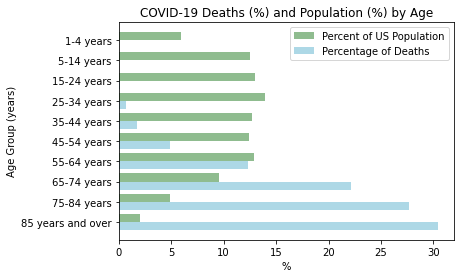

In [1305]:
x_axis = []
x_axis = age_data2['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data2['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data2['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.show()

Hospital Beds

In [1306]:
%pwd

'/Users/jenniecinelli/Desktop/HomeworkFolder/project_one/Folder4'

In [1307]:
hospital_beds = pd.read_csv("../Folder1/hospitalbeds_percapita_bystate.csv",skiprows=(0,1))
hospital_beds.head()

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.4,0.8,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.4,0.5,1.9
4,Arkansas,0.3,2.1,0.6,3.0


In [1308]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [1309]:
hospital_beds = hospital_beds.dropna()


In [1310]:
total_beds = []
total_beds = hospital_beds['Total'].tolist()

In [1311]:
states = hospital_beds["Location"].unique()

In [1312]:
Dict = {"States":[]}
for state in states:
    Dict["States"].append(us_state_abbrev[state])

In [1313]:
hospital_beds = pd.DataFrame(Dict)
hospital_beds['Total Beds'] = total_beds

 'Data include staffed beds for community hospitals, which represent 85% of all hospitals.',
       'Figures may not sum to totals due to rounding.', 'Sources',
       '1999 - 2019 AHA Annual Survey, Copyright 2020 by Health Forum, LLC, an affiliate of the American Hospital Association. Special data request, 2020. Available at [http://www.ahaonlinestore.com](https://ams.aha.org/eweb/DynamicPage.aspx?WebCode=ProdDetailAdd&ivd_prc_prd_key=165f9fbf-d766-40a9-96a6-a212aed366bb).',
       'Population data from Annual Population Estimates by State, U.S. Census Bureau; available at [http://www.census.gov/popest/](http://www.census.gov/popest/).',
       'Definitions',
       '*Community Hospitals:* All nonfederal, short-term general, and specialty hospitals whose facilities and services are available to the public.',
       '*N/A*: Not applicable when state/local government, non-profit, or for-profit hospitals do not exist in the state.'],
      dtype=object)

In [1314]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
#df_deathrate

In [1315]:
df_deathrate = df_deathrate.loc[df_deathrate['States']!='RMI']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='FSM']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='AS']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='NYC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PW']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='DC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PR']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='GU']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='MP']

In [1316]:
df_deathrate = df_deathrate.dropna()

In [1317]:
df_deathrate = df_deathrate.reset_index(drop=True)

In [1318]:
df_merge = df_deathrate.merge(hospital_beds, how='inner', on="States")

<AxesSubplot:xlabel='Total Beds', ylabel='Covid_Death_Rate'>

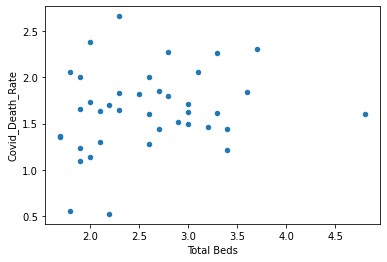

In [1319]:
df_merge.plot.scatter("Total Beds","Covid_Death_Rate")

In [1320]:
df_merge

,States,Covid_Death_Rate,Total Beds
0,AK,0.521335,2.2
1,UT,0.554209,1.8
2,ID,1.090293,1.9
3,WI,1.143160,2.0
4,WY,1.215988,3.4
5,CO,1.231980,1.9
6,ME,1.274175,2.6
7,NC,1.304560,2.1
8,OR,1.350021,1.7
9,WA,1.364381,1.7


In [1321]:
from scipy.stats import linregress

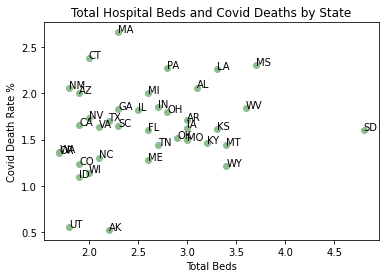

In [1322]:
plt.scatter(total_bed,Covid_Death_Rate, c='darkseagreen')
plt.xlabel('Total Beds')
plt.ylabel('Covid Death Rate %')
plt.title("Total Hospital Beds and Covid Deaths by State")

for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))
#plt.savefig("../Folder4/total beds and deaths scatter.png")
plt.show()

The r-squared is 0.04
The line equation is: y = 0.14x + 1.29


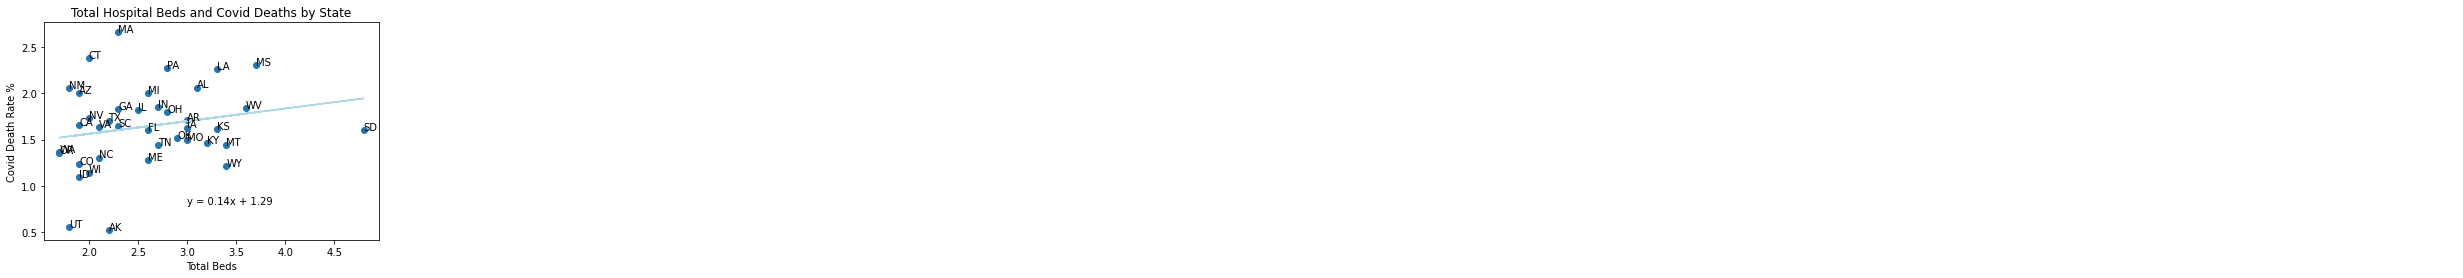

In [1323]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_bed, Covid_Death_Rate)

regress_values = total_bed * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(total_bed,Covid_Death_Rate)

plt.plot(total_bed,regress_values,"lightblue")

r_sqr = round(rvalue**2,2)

plt.annotate(line_eq,(3, .8),fontsize=10,color="black")

plt.annotate(f"The r-squared is: {r_sqr}",(25,0.5),fontsize=10,color="black")

plt.xlabel('Total Beds')
plt.ylabel('Covid Death Rate %')
plt.title("Total Hospital Beds and Covid Deaths by State")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")

for index, row in df_merge.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[2],row[1]))

#plt.savefig("../Folder4/total beds and deaths regression.png")
plt.show()


death by state

In [1324]:
df1 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")

In [1325]:
df1.rename(columns={"Unnamed: 0": "State", "Covid_Death_Rate":"Cum_Covid_19_Death_Rate"},inplace=True)
df1.drop([0,1,2,3,4,12,36,41,60,62,54,56,61],inplace=True)
df1 = df1.reset_index(drop=True)

In [1326]:
states = df1["State"]
death_rate = df1["Cum_Covid_19_Death_Rate"]

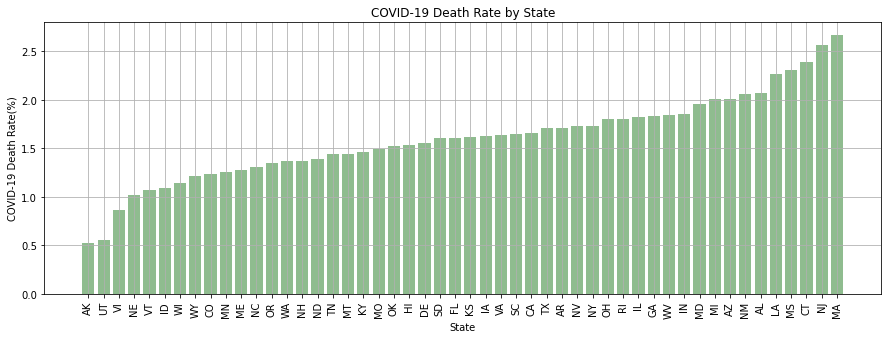

In [1327]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen')
plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.xticks(rotation = 90)
#plt.savefig("../Folder4/death-rate-by-state.png")
plt.show()